In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Part 1

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins['year'] = logins['login_time'].dt.year
logins['month'] = logins['login_time'].dt.month
logins['day'] = logins['login_time'].dt.day
logins['hour'] = logins['login_time'].dt.hour
logins['weekday'] = logins['login_time'].dt.weekday

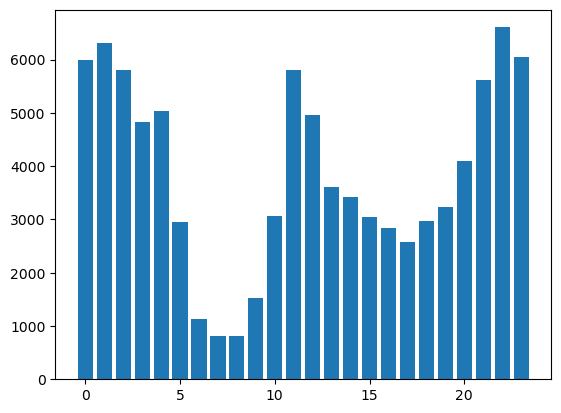

In [5]:
by_hour = logins.groupby(['hour']).count()
plt.bar(x=range(24),height=by_hour['login_time'].to_numpy());

Seems like most of the logins happen at night or around noon

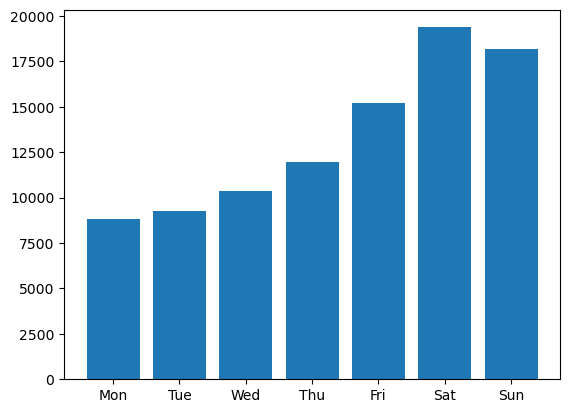

In [22]:
by_weekday = logins.groupby(['weekday']).count()
plt.bar(x=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],height=by_weekday['login_time'].to_numpy());

There is a clear rise in the number of logins as you go into the weekend

In [24]:
by_hour = logins.groupby(['weekday','hour'],as_index=False).count()

by_hour

,weekday,hour,login_time,year,month,day
0,0,0,531,531,531,531
1,0,1,414,414,414,414
2,0,2,312,312,312,312
3,0,3,236,236,236,236
4,0,4,206,206,206,206
...,...,...,...,...,...,...
163,6,19,632,632,632,632
164,6,20,612,612,612,612
165,6,21,625,625,625,625
166,6,22,583,583,583,583


In [ ]:
by_hour = logins.groupby(['weekday','hour']).count()
plt.bar(x=range(24),height=by_hour['login_time'].to_numpy());

In [26]:
logins['login_time'] = logins['login_time'].dt.ceil('d')
by_hour = logins.groupby(['login_time']).count()

In [33]:
by_hour

,year,month,day,hour,weekday
login_time,,,,,
1970-01-02,112,112,112,112,112
1970-01-03,681,681,681,681,681
1970-01-04,793,793,793,793,793
1970-01-05,788,788,788,788,788
1970-01-06,459,459,459,459,459
...,...,...,...,...,...
1970-04-10,818,818,818,818,818
1970-04-11,1009,1009,1009,1009,1009
1970-04-12,1352,1352,1352,1352,1352


<Axes: xlabel='login_time'>

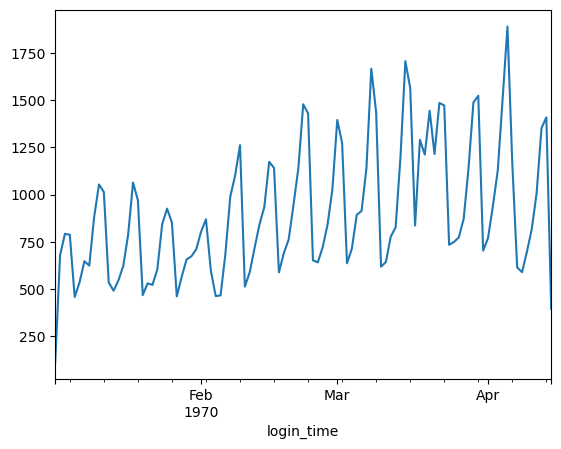

In [34]:
by_hour['hour'].plot()

Part 2

1) key measure of success: revenue gained specifically from driver partners operating in their respective secondary city. If the drivers take advantage of the toll reimbursement, there should be a significant change in the number of trips they take in their secondary city.

2) To run the experiment, I would control by first collecting data on the drivers trips for the two weeks. This data would ideally include 
    - the drivers location when accepting the trip
    - pickup location
    - dropoff location
    - price of trip
    - Date time of trip at pick up

    Only after collecting this data, I would inform the drivers of this promotion and have it start in the next week after the initial two weeks. This way the drivers decisions are not affected by them knowing that this promotion is coming soon. Then I would run the experiment for another 2 weeks. I would use a t-test to measure if there was a significant difference in the mean for the 'key measure of success' specifically for drivers I've identified from the first part of the experiment as having a primary city (I expect that not all drivers operate primarily in one city) 
